In [93]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import tree
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, RidgeCV,Lasso
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

In [94]:
# Read the data set and get a breif look at the values 
data = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

nrows,ncols = data.shape
print(data.describe())
data.head()
print(data.isnull().sum())
data.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
partyNames = data['Name'].str.rpartition('.')
#partyNames.str.rpartition('.')
namesDf = pd.DataFrame(data=partyNames[0])
tempDf = namesDf.squeeze().str.rpartition(', ')
newDf = pd.DataFrame({"Party":tempDf[:][0],"Prefix":tempDf[:][2]})
#partyNames.head()
#partyKey = partyNames.unique()
#partyKey0


newData = pd.concat([data, newDf], axis = 1)
newData.head()
#newData=newData.drop(['1'],axis = 1) 
newData.rename(columns = {'0':'Party', '2':'Prefix'}, inplace = True)
newData.head()
newData.to_csv("modTrain.csv")
newData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,Allen,Mr


In [153]:
data.head()
dep = data[['Survived']]
ind = pd.get_dummies(newData, columns = ['Embarked','Sex','Pclass','Prefix']).drop(['Survived','Ticket','Cabin','Name','Party'],axis = 1) # Encode the categorical features
ind.describe()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Prefix_Miss,Prefix_Mlle,Prefix_Mme,Prefix_Mr,Prefix_Mrs,Prefix_Mrs. Martin (Elizabeth L,Prefix_Ms,Prefix_Rev,Prefix_Sir,Prefix_the Countess
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.726029,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.352413,0.647587,...,0.204265,0.002245,0.001122,0.580247,0.139169,0.001122,0.001122,0.006734,0.001122,0.001122
std,257.353842,13.411054,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.477990,...,0.403390,0.047351,0.033501,0.493796,0.346318,0.033501,0.033501,0.081830,0.033501,0.033501
min,1.000000,-3.894009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# Impute missing data values
print(data.isnull().sum())
ageMissing = ind[['Age','SibSp','Parch']].values.reshape(nrows,3)
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(ageMissing)
imputedAges = (imp.transform(ageMissing))
ind[['Age','SibSp','Parch']] = imputedAges
ind.head()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Mrs. Martin (Elizabeth L,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_ the Countess
0,1,22.0,1.0,0.0,7.2500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,38.0,1.0,0.0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0.0,0.0,7.9250,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,35.0,1.0,0.0,53.1000,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,35.0,0.0,0.0,8.0500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [114]:
# Validation split
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=1)

In [145]:
# Logistic Regresssion 
log = LogisticRegression(max_iter = 100000,solver='lbfgs',multi_class='ovr',dual=False)
log_1 = log.fit(X_train,np.asarray(y_train).ravel())
pred = log_1.predict(X_test)
cfMat = confusion_matrix(y_test,pred)
cfMat
acc = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
print("Acc",acc)
cfDf = pd.DataFrame(data=cfMat, index = ["Negative","Positive"], columns = ["Negative","Positive"])
print(cfDf)

Acc 0.7988826815642458
          Negative  Positive
Negative        91        15
Positive        21        52


In [142]:
# Decision Tree Classifier 
dtc = DecisionTreeClassifier()
dtc_1 = dtc.fit(X_train,y_train)
dtc_1.score(X_train,y_train)
pred = dtc_1.predict(X_test)
cfMat = confusion_matrix(y_test,pred)
cfMat
acc = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
print("Acc",acc)
cfDf = pd.DataFrame(data=cfMat, index = ["Negative","Positive"], columns = ["Negative","Positive"])
print(cfDf)

Acc 0.7374301675977654
          Negative  Positive
Negative        84        22
Positive        25        48


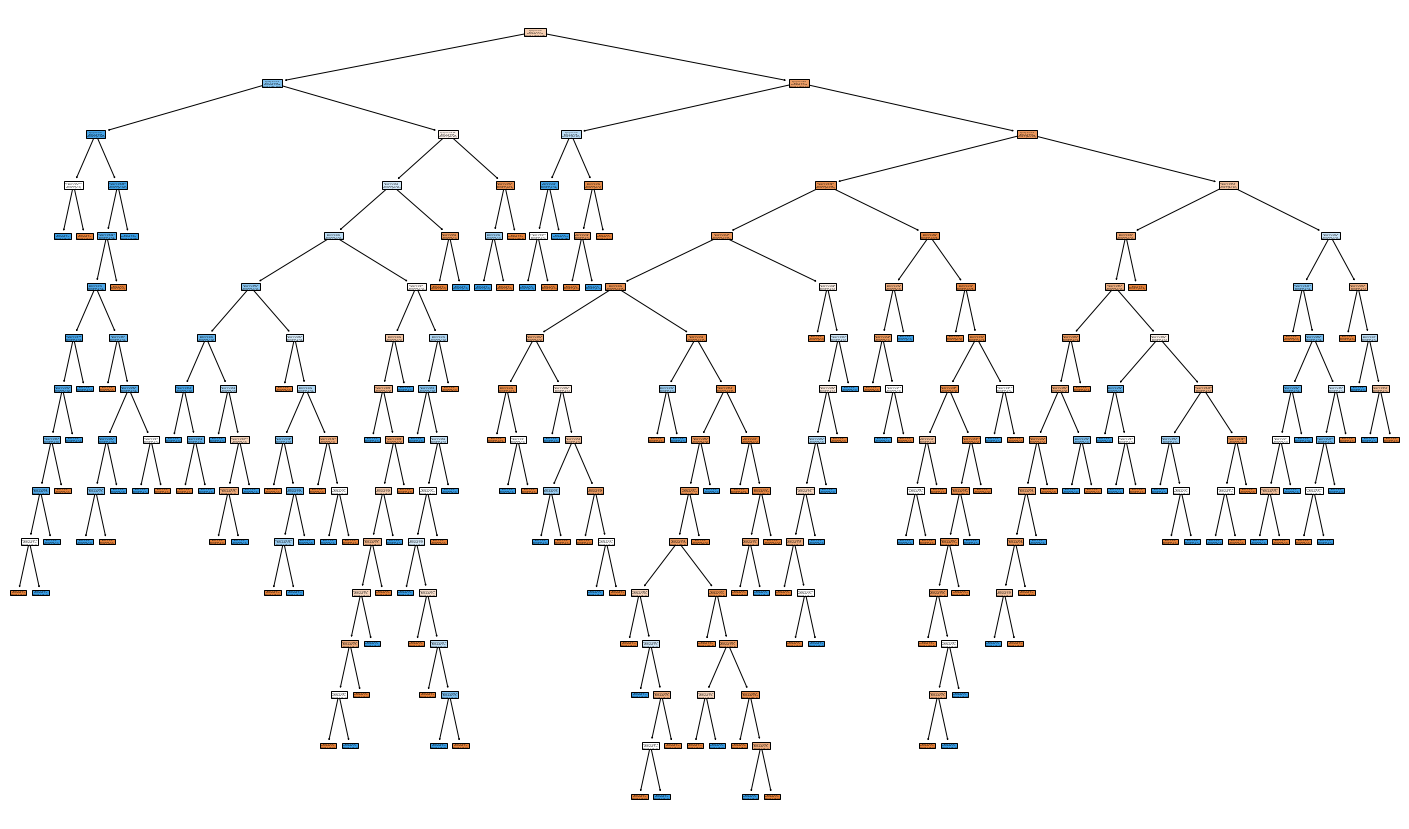

In [101]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(dtc_1, 
                   #feature_names=ind.feature_names,  
                   #class_names=dep.target_names,
                   filled=True)

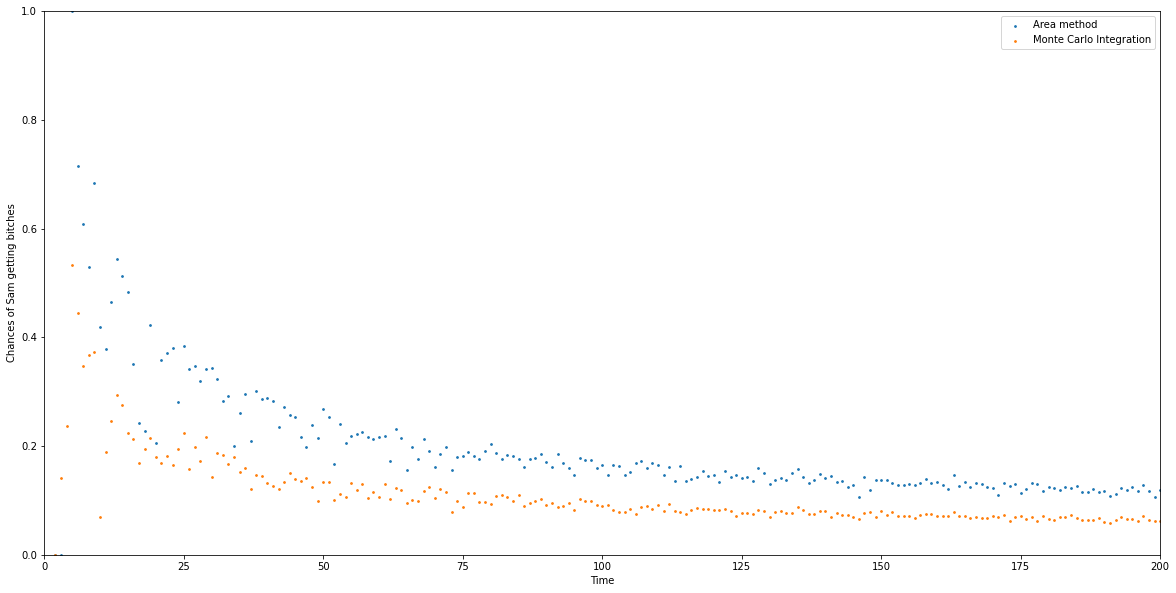

In [7]:
# import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
# sns.set(rc={'text.usetex' : True})

plt.rcParams["figure.figsize"] = (20,10)
plt.clf()

n = int(1e3)
pi_estimate1 = np.full(n, np.nan)
pi_estimate2 = np.full(n, np.nan)
std1 = np.full(n, np.nan)
std2 = np.full(n, np.nan)
sample_size = 1 + np.arange(n)

for i in range(n):
    np.random.seed(i)
    u1 = np.random.uniform(size = i)
    u2 = np.random.uniform(size = i)
    x = u1**2 + u2**2

    darts = np.zeros(i)
    darts[x <= 1] = 1
    in_circle_proportion = np.mean(darts)
    pi_estimate1[i] = 4 * in_circle_proportion
    std1[i] = 4*np.std(darts)/np.sqrt(i)

    sample = 4 * np.sqrt(1 - u1 ** 2)
    pi_estimate2[i] = np.mean(sample)
    std2[i] = np.std(sample)/np.sqrt(i)


plt.scatter(sample_size, std1, s = 3, label = 'Area method')
plt.scatter(sample_size, std2, s = 3, label = 'Monte Carlo Integration')
plt.xlabel("Time")
plt.ylabel('Chances of Sam getting bitches')
plt.ylim(top = 1)
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.xlim(right = 200)
plt.legend()
plt.show()